In [4]:
import pandas as pd

# ファイルパスを指定します。適切なパスに置き換えてください。
file_path = 'drive/MyDrive/心不全予測/train.csv'

# CSVファイルを読み込みます。
df = pd.read_csv(file_path)

# データフレームの中身を表示します。
print(df.head())


   id  age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0   0   56        1                      5882         0                 38   
1   3   50        0                      1767         1                 35   
2   7   41        0                       250         1                 30   
3  11   47        0                       582         1                 20   
4  12   60        0                        80         0                 25   

   high_blood_pressure    platelets  serum_creatinine  serum_sodium  sex  \
0                    0  185315.0104          0.844417           134    1   
1                    0  371620.3666          0.837448           136    0   
2                    0  372810.2084          0.819996           139    1   
3                    0  185780.6482          0.870314           137    0   
4                    0  265096.3999          0.828112           136    1   

   smoking  time  target  
0        0    10       1  
1        0   187    

In [5]:
print(df.describe())


                id          age     anaemia  creatinine_phosphokinase  \
count  1000.000000  1000.000000  1000.00000               1000.000000   
mean    999.734000    57.632000     0.41600                605.359000   
std     578.002214     9.875328     0.49314                971.937382   
min       0.000000    39.000000     0.00000                 23.000000   
25%     496.750000    50.000000     0.00000                 93.000000   
50%    1007.500000    58.000000     0.00000                255.000000   
75%    1512.250000    61.000000     1.00000                582.000000   
max    1998.000000    85.000000     1.00000               7861.000000   

          diabetes  ejection_fraction  high_blood_pressure      platelets  \
count  1000.000000        1000.000000          1000.000000    1000.000000   
mean      0.270000          36.691000             0.237000  278330.242337   
std       0.444182          11.037089             0.425455   79543.675235   
min       0.000000          14.000

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [9]:


# 特徴量とターゲット変数にデータを分割
X = df.drop(['id', 'target'], axis=1)
y = df['target']

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [40]:
# モデルの定義
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# モデルのコンパイル
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# モデルのトレーニング
model.fit(X_scaled, y, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
32/32 [==============================] - 2s 5ms/step - loss: 0.5146 - accuracy: 0.7910
Epoch 2/50
32/32 [==============================] - 0s 6ms/step - loss: 0.4164 - accuracy: 0.8190
Epoch 3/50
32/32 [==============================] - 0s 7ms/step - loss: 0.3836 - accuracy: 0.8320
Epoch 4/50
32/32 [==============================] - 0s 6ms/step - loss: 0.3547 - accuracy: 0.8470
Epoch 5/50
32/32 [==============================] - 0s 5ms/step - loss: 0.3387 - accuracy: 0.8570
Epoch 6/50
32/32 [==============================] - 0s 5ms/step - loss: 0.3190 - accuracy: 0.8710
Epoch 7/50
32/32 [==============================] - 0s 5ms/step - loss: 0.2920 - accuracy: 0.8700
Epoch 8/50
32/32 [==============================] - 0s 5ms/step - loss: 0.2733 - accuracy: 0.8940
Epoch 9/50
32/32 [==============================] - 0s 5ms/step - loss: 0.2427 - accuracy: 0.8960
Epoch 10/50
32/32 [==============================] - 0s 5ms/step - loss: 0.2238 - accuracy: 0.9110
Epoch 11/50
32/32 [

In [11]:
# Adamオプティマイザの学習率を確認
learning_rate = model.optimizer.lr
print("学習率:", learning_rate)

学習率: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


In [41]:
# モデルのコンパイル
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# モデルのトレーニング
history = model.fit(X_scaled, y, epochs=50, batch_size=32, verbose=1)

# Adamオプティマイザの学習率を確認
learning_rate = model.optimizer.lr
print("学習率:", learning_rate)


Epoch 1/50
32/32 [==============================] - 2s 6ms/step - loss: 0.0327 - accuracy: 0.9860
Epoch 2/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0340 - accuracy: 0.9870
Epoch 3/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0433 - accuracy: 0.9860
Epoch 4/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0402 - accuracy: 0.9800
Epoch 5/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0424 - accuracy: 0.9870
Epoch 6/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0304 - accuracy: 0.9870
Epoch 7/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0308 - accuracy: 0.9870
Epoch 8/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0276 - accuracy: 0.9880
Epoch 9/50
32/32 [==============================] - 0s 7ms/step - loss: 0.0261 - accuracy: 0.9910
Epoch 10/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0218 - accuracy: 0.9910
Epoch 11/50
32/32 [

KeyError: 'val_loss'

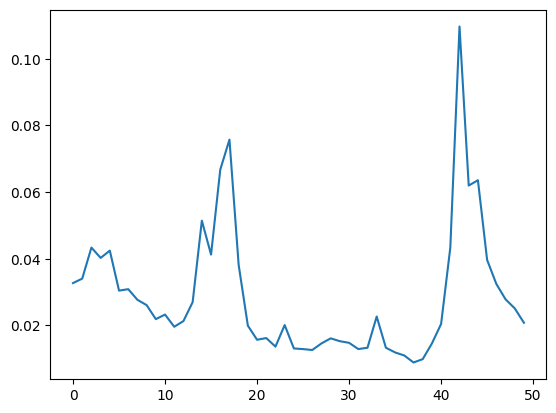

In [42]:
import matplotlib.pyplot as plt

# 学習曲線のプロット
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


KeyError: 'val_accuracy'

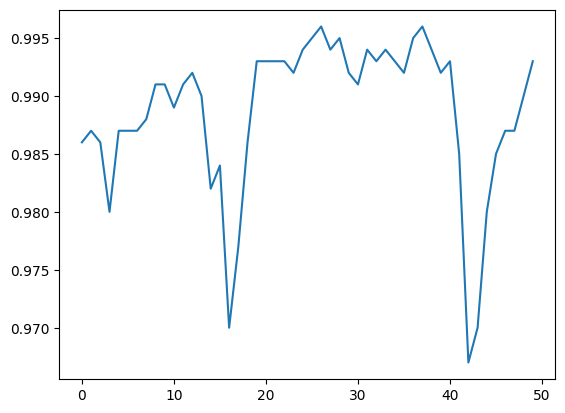

In [43]:
# 学習曲線のプロット
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
print(test_df.columns)


Index(['id', 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')


In [44]:
# テストデータを読み込む
test_df = pd.read_csv('drive/MyDrive/心不全予測/test.csv')


# 特徴量のみを取得
X_test = test_df.drop('id', axis=1)

# テストデータの標準化
X_test_scaled = scaler.transform(X_test)


In [45]:
# 予測を生成
predictions = model.predict(X_test_scaled)

# 予測結果を提出用のサンプルファイルの形式に整形
submission_df = pd.DataFrame()
submission_df['index'] = test_df['id']  # インデックスを提出用ファイルの1列目に設定
submission_df['prediction'] = predictions  # 予測結果を提出用ファイルの2列目に設定

# CSVファイルとして保存（ヘッダーなし）
submission_df.to_csv('drive/MyDrive/心不全予測/sample_submission.csv', index=False, header=False)




32/32 [==============================] - 0s 2ms/step


In [36]:
# テストデータを読み込む
sub_df = pd.read_csv('drive/MyDrive/心不全予測/sample_submission2.csv')


# データフレームの中身を表示します。
print(sub_df.head())


   1  0.0015521618
0  2  9.983821e-01
1  4  1.394874e-01
2  5  6.150584e-08
3  6  1.431713e-07
4  8  9.993507e-01


In [46]:
# 予測を生成
predictions = model.predict(X_test_scaled)

# 0.5以上の場合は1、それ以下の場合は0に変換
binary_predictions = (predictions >= 0.5).astype(int)

# 提出用のデータフレームを作成
submission_df = pd.DataFrame()
submission_df['index'] = test_df['id']
submission_df['prediction'] = binary_predictions

# CSVファイルとして保存（ヘッダーなし）
submission_df.to_csv('drive/MyDrive/心不全予測/sample_submission3.csv', index=False, header=False)


32/32 [==============================] - 0s 4ms/step


In [48]:
# テストデータを読み込む
sub_df = pd.read_csv('drive/MyDrive/心不全予測/sample_submission3.csv')


# データフレームの中身を表示します。
print(sub_df.head())

   1  0
0  2  1
1  4  1
2  5  0
3  6  0
4  8  1
